In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
emails_df = pd.read_csv('/content/email.csv')
emails_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [49]:
emails_df_cleaned = emails_df #already clean data
emails_df_cleaned

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [50]:
emails_df_cleaned.dropna(inplace = True)

In [51]:
emails_df_cleaned.isnull().sum()

,0
Category,0
Message,0


In [52]:
def tokenize_email(text):
    # Use NLTK's word tokenizer
    tokens = nltk.word_tokenize(text)
    return tokens

<function matplotlib.pyplot.show(close=None, block=None)>

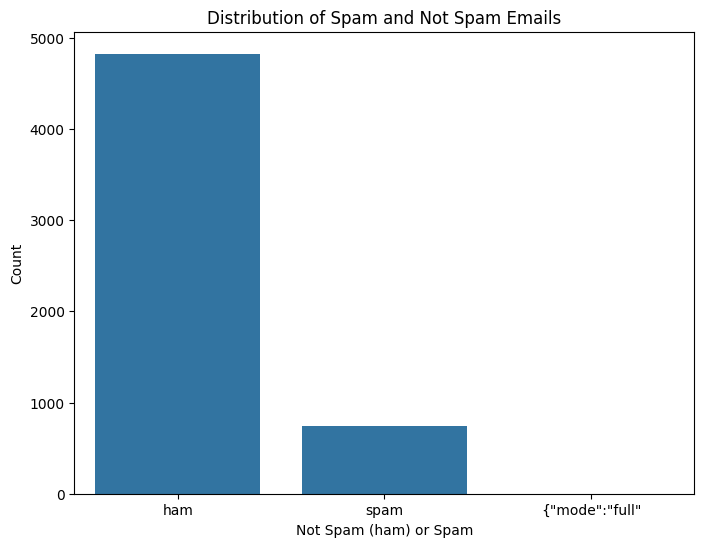

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=emails_df_cleaned)
plt.title('Distribution of Spam and Not Spam Emails')
plt.xlabel('Not Spam (ham) or Spam')
plt.ylabel('Count')
plt.show

In [67]:
# Initialize the CountVectorizer
#vectorizer = CountVectorizer(tokenizer=tokenize_email, stop_words='english')

# Transform the emails into a bag-of-words model
#X = vectorizer.fit_transform(emails_df_cleaned.drop(columns=['Category']))
#vectorizer = TfidfVectorizer(stop_words='english')
#X = vectorizer.fit_transform(emails_df_cleaned['Message'])

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned dataset
X = vectorizer.fit_transform(emails_df_cleaned['Message'])

# Print the feature names (tokens)
print(vectorizer.get_feature_names_out())

# Print the TF-IDF matrix
print(X.toarray())
y = emails_df_cleaned['Category']

['00' '000' '000pes' ... 'èn' 'ú1' '〨ud']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [71]:
y_pred_nb  = nb_classifier.predict(X_test)

In [72]:
y_pred_nb

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
   

<function matplotlib.pyplot.show(close=None, block=None)>

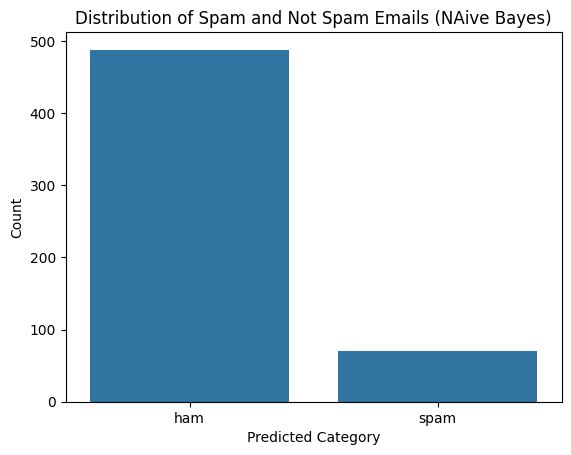

In [90]:
sns.countplot(x=y_pred_nb)
plt.title('Distribution of Spam and Not Spam Emails (NAive Bayes)')
plt.xlabel('Predicted Category')
plt.ylabel('Count')
plt.show

In [78]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print("Naive Bayes Classification Report:\n", nb_classification_report)

Naive Bayes Accuracy: 0.9587813620071685
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.98       465
        spam       1.00      0.75      0.86        93

    accuracy                           0.96       558
   macro avg       0.98      0.88      0.92       558
weighted avg       0.96      0.96      0.96       558



In [80]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [81]:
y_pred_svm = svm_classifier.predict(X_test)

In [82]:
y_pred_svm

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',


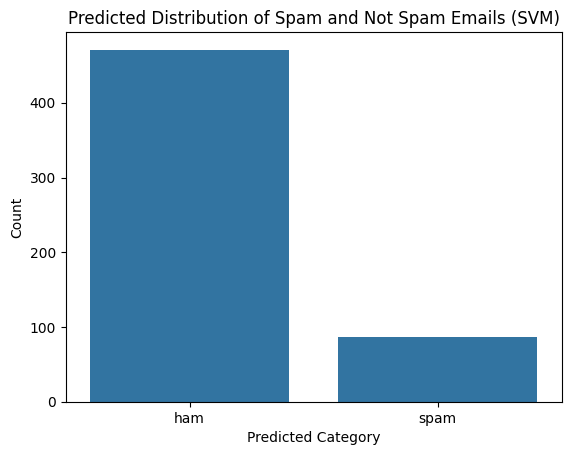

In [91]:
sns.countplot(x=y_pred_svm)
plt.title('Predicted Distribution of Spam and Not Spam Emails (SVM)')
plt.xlabel('Predicted Category')
plt.ylabel('Count')
plt.show()

In [86]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

In [87]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print("SVM Classification Report:\n", svm_classification_report)

SVM Accuracy: 0.989247311827957
SVM Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       465
        spam       1.00      0.94      0.97        93

    accuracy                           0.99       558
   macro avg       0.99      0.97      0.98       558
weighted avg       0.99      0.99      0.99       558



In [92]:
#COMPARISON

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

Naive Bayes Accuracy: 0.9587813620071685
SVM Accuracy: 0.989247311827957


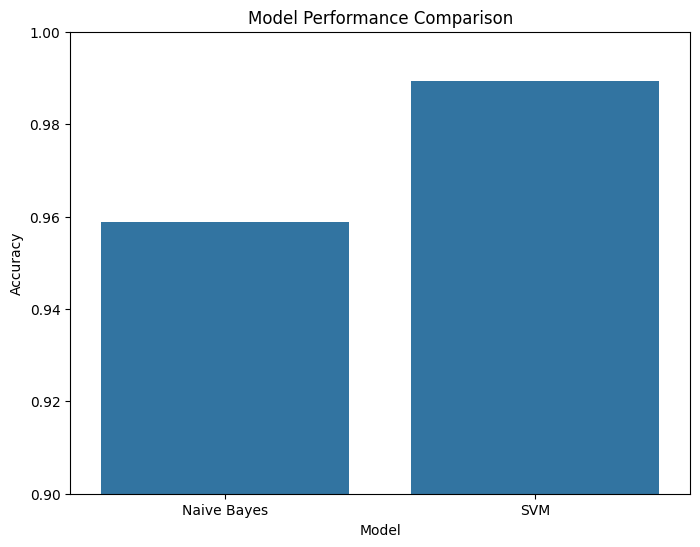

In [93]:
#COMPARISON BY PLOT

model_performance = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [nb_accuracy, svm_accuracy]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()